In [20]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
sns.set()
from pandas.plotting import radviz
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

In [4]:
#iris = pd.read_csv('iris.csv')
iris = sns.load_dataset("iris")
iris = shuffle(iris)
iris.shape

(150, 5)

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,versicolor
66,5.6,3.0,4.5,1.5,versicolor
135,7.7,3.0,6.1,2.3,virginica
78,6.0,2.9,4.5,1.5,versicolor
130,7.4,2.8,6.1,1.9,virginica


In [6]:
iris.species.unique()

array(['versicolor', 'virginica', 'setosa'], dtype=object)

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<IPython.core.display.Javascript object>


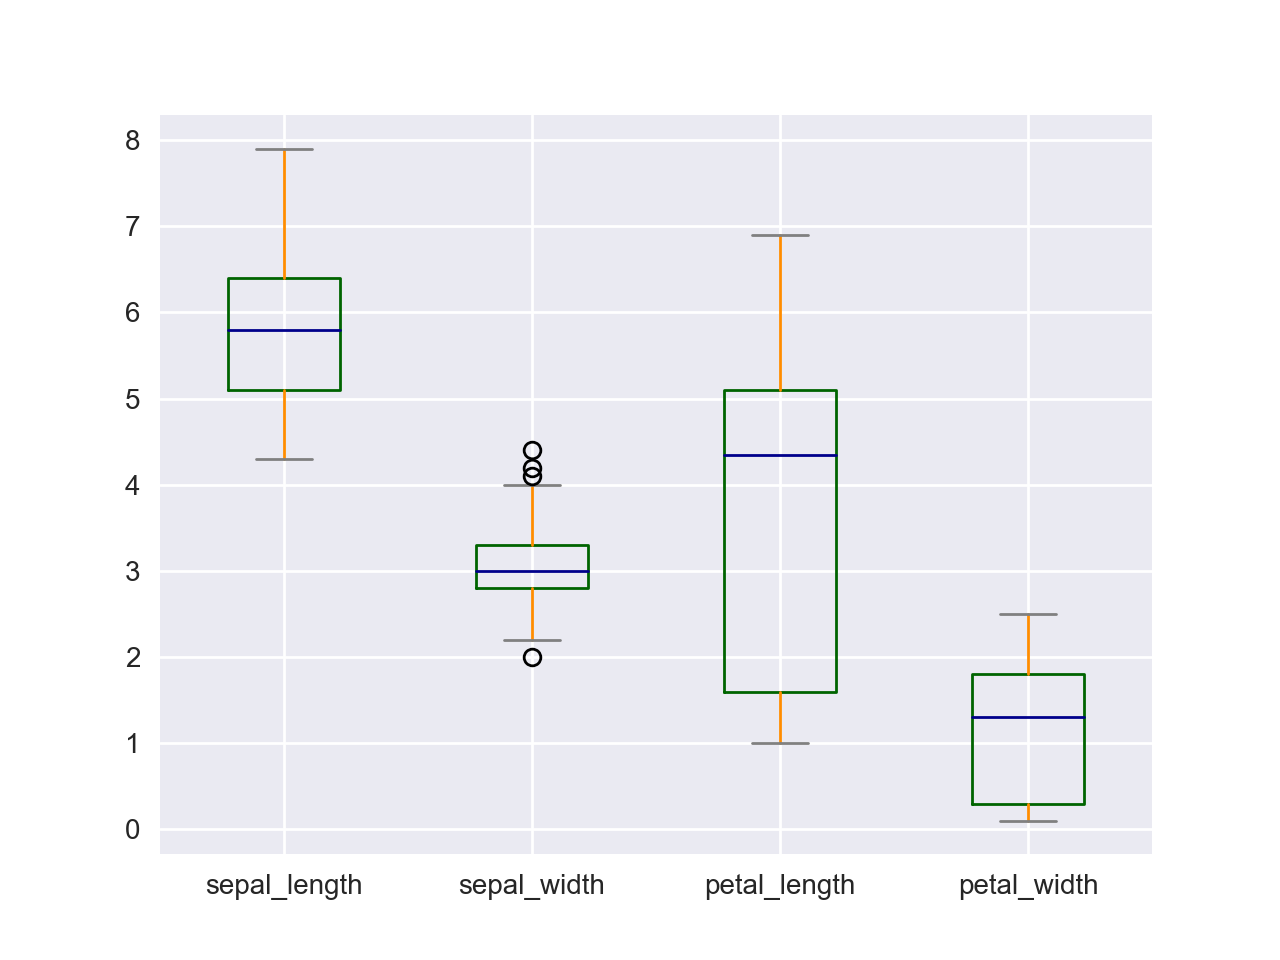

In [24]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
iris.plot.box(color=color)

In [10]:
X = iris[['sepal_length','sepal_width','petal_length','petal_width']]
y = np.ravel(iris[['species']])

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
kf = KFold(150,n_folds=10,shuffle=False)
print(kf)
for iter, data in enumerate(kf, start=1):
    print(iter, data[0], data[1])
scores = cross_val_score(knn,X,y,cv=10, scoring='accuracy')
print(scores)

sklearn.cross_validation.KFold(n=150, n_folds=10, shuffle=False, random_state=None)
1 [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92

In [14]:
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - although they are many
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())


[ 1.          0.93333333  1.          0.86666667  0.93333333  1.
  0.93333333  1.          0.93333333  1.        ]
0.96


In [18]:
X = iris[['sepal_length','sepal_width','petal_length','petal_width']]
y = np.ravel(iris[['species']])
num_neighbors = 50
scores = []
for i in range(1,num_neighbors):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    scores.append(score.mean())

0.98
49


<IPython.core.display.Javascript object>


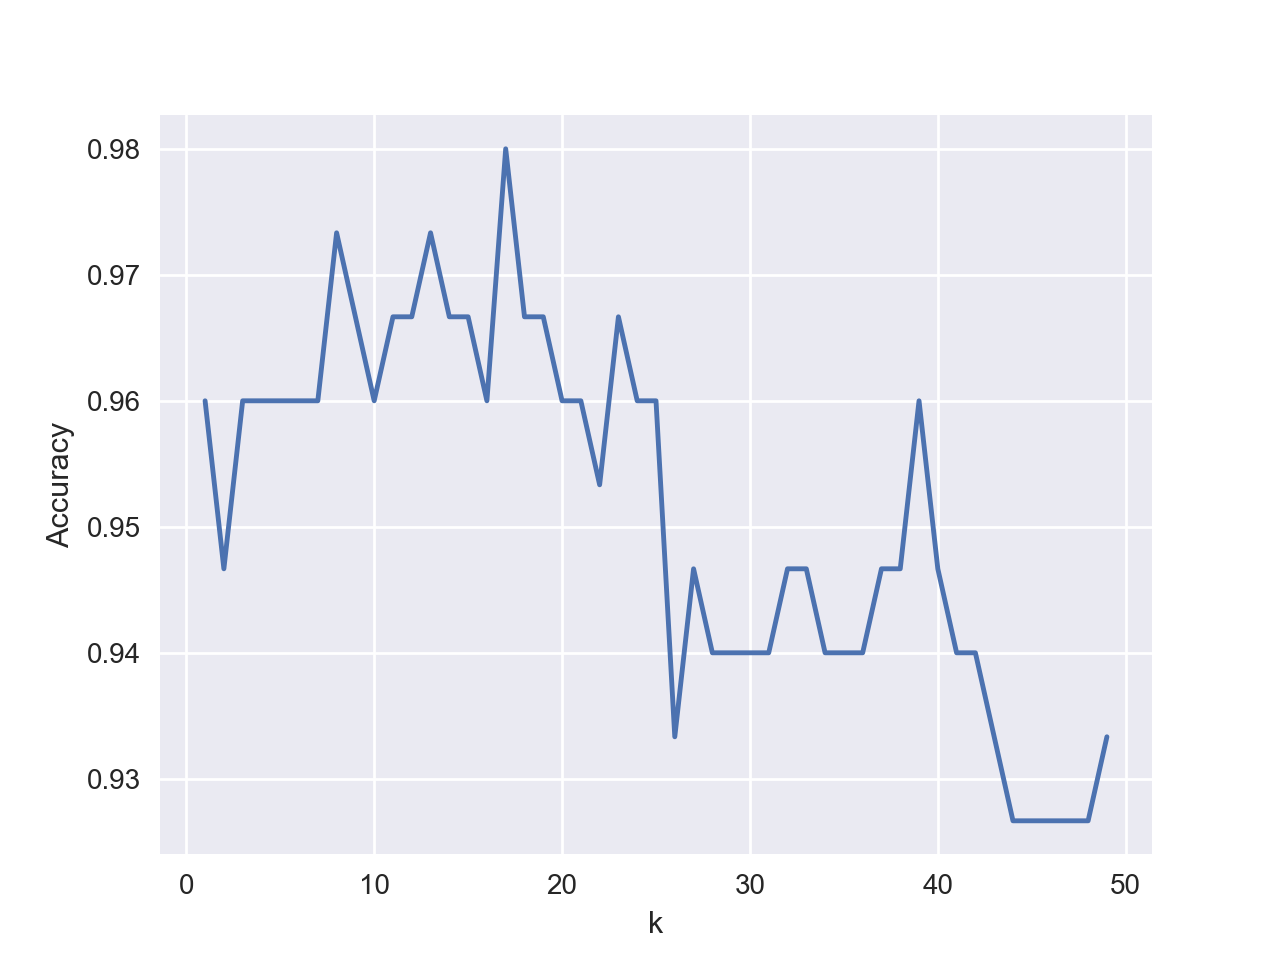

Text(0, 0.5, 'Accuracy')

In [21]:
print(max(scores))
print(len(scores))
plt.plot(range(1,num_neighbors),scores)
plt.xlabel('k')
plt.ylabel('Accuracy')

In [23]:
knn = KNeighborsClassifier(n_neighbors = 17)
score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(score.mean())

0.98
